# Social Media Sentiments Analysis
Social media analysis is to understand audience, develop creative contents, increase traffic and sales, boost ROI, and improve strategic decision-making to achieve social media goals. Audience analysis helps improving customer experience, brand perception, and marketing strategy. Meanwhile, sentiment analysis is to find out how audience feel about your brand on social media via engagement activities such as likes, follows, clicks, retweets, comments, impressions, interests, and behaviours, etc. These metrics help marketing campains and measuring key performance indicators(KPIs).


###1. IMPORT LIBRARIES AND LOAD DATA

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("sentimentdataset.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### 2. Preprocessing: Inspect and Clean Data

In [ ]:
print('Infomation of dataset: ', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
Infomation of dataset:  None


In [ ]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
df.duplicated().sum()

0

### 3. Preprocessing: Wrangle and Transform data

In [ ]:
df1=df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
df1.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [ ]:
df1.describe(include=['object'])

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,732,732,732,732,732,732,732
unique,707,279,683,685,4,697,115
top,"A compassionate rain, tears of empathy fallin...",Positive,2022-07-17 06:15:00,WindWhisperer,Instagram,#Compassionate #TearsOfEmpathy,USA
freq,3,44,3,3,258,3,59


In [ ]:
df1['Text']= df1['Text'].str.strip()
df1['Sentiment']= df1['Sentiment'].str.strip()
df1['User']= df1['User'].str.strip()
df1['Platform']= df1['Platform'].str.strip()
df1['Hashtags']= df1['Hashtags'].str.strip()
df1['Country']= df1['Country'].str.strip()

In [ ]:
print("Print unique values in 'Platform'column: ", df1['Platform'].unique(), '\n')
print("Value counts in 'Platform' column: ", '\n', df1['Platform'].value_counts())

Print unique values in 'Platform'column:  ['Twitter' 'Instagram' 'Facebook'] 

Value counts in 'Platform' column:  
 Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64


In [ ]:
df1.sample(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
305,"Frustrated fingers tapping on the keyboard, a ...",Frustrated,2020-12-17 09:20:00,PuzzleComposer,Instagram,#Frustrated #UnsolvablePuzzle,12.0,24.0,India,2020,12,17,9
336,Calmness found in the rhythm of raindrops on t...,Calmness,2017-11-08 21:20:00,RainWatcher,Twitter,#Calmness #RainyDays,18.0,35.0,Australia,2017,11,8,21
12,Exploring the city's hidden gems.,Positive,2023-01-18 14:50:00,UrbanExplorer,Facebook,#CityExplore #HiddenGems,12.0,25.0,UK,2023,1,18,14
373,Enveloped in serenity while practicing mindful...,Mindfulness,2017-10-20 08:15:00,ZenSeeker,Instagram,#Mindfulness #LakeTranquility,35.0,70.0,Canada,2017,10,20,8
156,Compassion in volunteering for a local charity.,Compassion,2015-12-18 14:20:00,CharityVolunteer,Facebook,#Compassion #VolunteerWork,18.0,35.0,USA,2015,12,18,14


In [ ]:
# Transform the 'Timestamp' column to two columns, 'Date', 'Time','Weekday'
import datetime as dt
df1['time'] = pd.to_datetime(df1.Timestamp)
df1['Date'] = df1['time'].dt.date
df1['Time'] = df1['time'].dt.time
df1['Weekday']=df1['time'].dt.weekday  #<--- weekday value: 0 ~ 6


In [ ]:
df1.sample(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,time,Date,Time,Weekday
35,Quality time with family this weekend.,Positive,2023-01-26 17:40:00,FamilyTime,Facebook,#FamilyTime #Weekend,22.0,45.0,UK,2023,1,26,17,2023-01-26 17:40:00,2023-01-26,17:40:00,3
637,Hosted a 'memory lane' evening with old friend...,Gratitude,2023-07-16 14:00:00,SeniorMemoriesHost,Instagram,#FriendshipAdventures #SeniorNostalgia,30.0,60.0,USA,2023,7,16,14,2023-07-16 14:00:00,2023-07-16,14:00:00,6
687,Witnessed a heated argument in the cafeteria. ...,Hate,2023-09-15 14:15:00,CafeteriaConflictHighSchool,Instagram,#CafeteriaDrama #HighSchoolTension,21.0,41.0,Canada,2023,9,15,14,2023-09-15 14:15:00,2023-09-15,14:15:00,4
612,"Exploring the art of meditation, finding tranq...",Contentment,2023-06-21 19:00:00,MeditationSenior,Twitter,#MindfulLiving #SeniorCalm,18.0,35.0,UK,2023,6,21,19,2023-06-21 19:00:00,2023-06-21,19:00:00,2
297,"Bitterness festering like a venomous vine, ent...",Bitterness,2019-03-08 14:20:00,VenomousSoul,Facebook,#Bitterness #ResentmentWeb,12.0,24.0,UK,2019,3,8,14,2019-03-08 14:20:00,2019-03-08,14:20:00,4


In [ ]:
# drop two extra columns: 'timestamp', 'time'
df2=df1.drop(['Timestamp', 'time'], axis=1)
df2.head(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Weekday
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15,12:30:00,6
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15,08:45:00,6


In [ ]:
# Transform name of the column and create new column 'Month_name' using replace() function
df2['Monthname']=df2['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
df2['Weekdayname']=df2['Weekday'].replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
df2.head(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Weekday,Monthname,Weekdayname
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15,12:30:00,6,Jan,Sun
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15,08:45:00,6,Jan,Sun


In [ ]:
df2.drop('Weekday', axis=1).sample(2)

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Date,Time,Monthname,Weekdayname
574,Surrounded by the vibrant colors of a flower g...,Nature's Beauty,GardeningEnthusiastFlowerGarden,Instagram,#NaturesBeauty #FloralJoy,28.0,55.0,Australia,2020,5,15,18,2020-05-15,18:30:00,May,Fri
674,Accidentally sent a love letter to the wrong p...,Embarrassed,LoveLetterBlunderHighSchool,Facebook,#LoveLetterFail #HighSchoolAwkward,17.0,33.0,USA,2023,9,2,18,2023-09-02,18:30:00,Sep,Sat


In [ ]:
print('Name of value in the Monthname column:', df2.Monthname.unique())
print('Name of value in the Weekdayname column: ', df2.Weekdayname.unique())

Name of value in the Monthname column: ['Jan' 'Feb' 'Mar' 'May' 'Aug' 'Jun' 'Nov' 'Apr' 'Sep' 'Jul' 'Oct' 'Dec']
Name of value in the Weekdayname column:  ['Sun' 'Mon' 'Tue' 'Wed' 'Thur' 'Fri' 'Sat']


###4. Analyze and visualize data

Text(0.5, 1.0, 'Kinds of Sentiment in descending order')

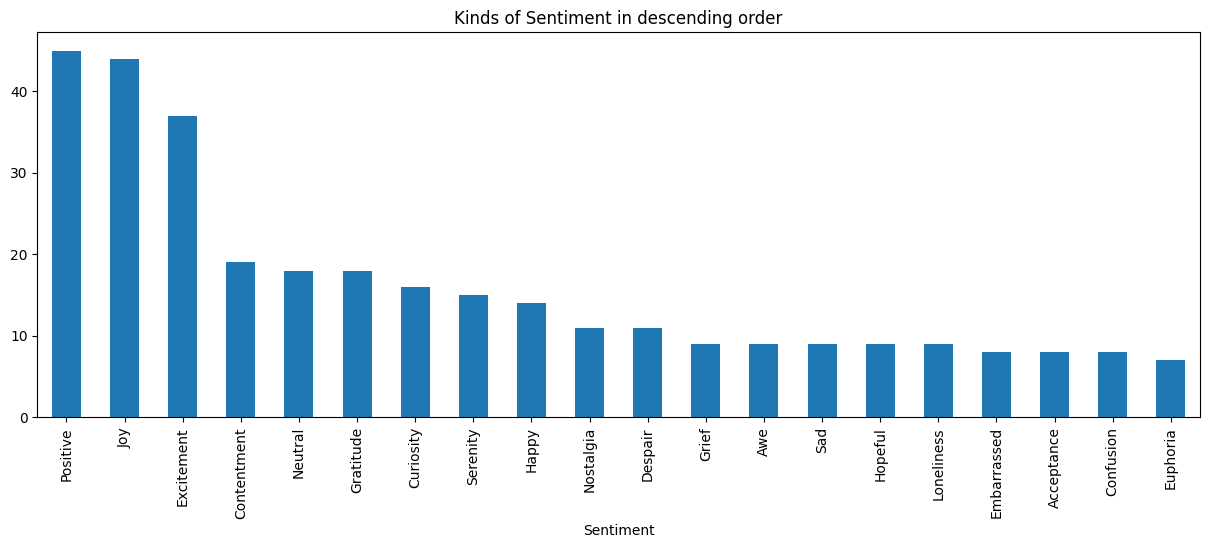

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
df2['Sentiment'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Kinds of Sentiment in descending order")

Text(0.5, 1.0, 'Proportion of Platform')

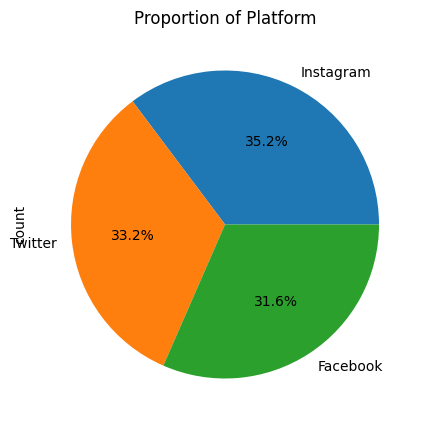

In [ ]:
plt.figure(figsize=(10, 5))
df2['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Platform")

<Axes: xlabel='Country'>

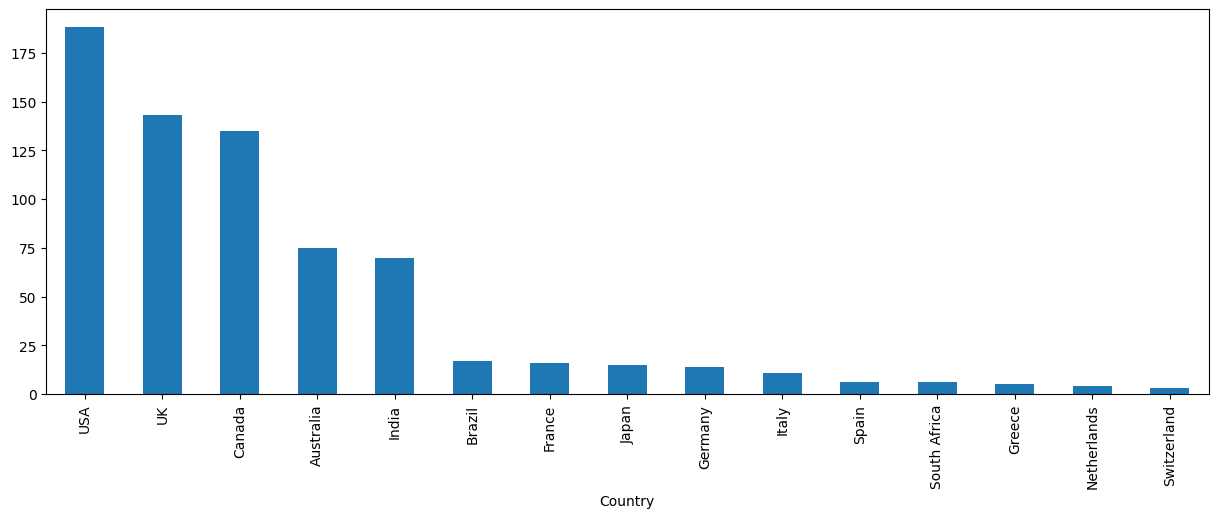

In [ ]:
plt.figure(figsize=(15, 5))
df2['Country'].value_counts().nlargest(15).plot(kind='bar')

In [ ]:
for column in df2[['Year', 'Likes', 'Retweets']]:
    print(f"Maxiumn value: {column}:{df2[column].max()} | Minimum value: {column}:{df2[column].min()}")

Maxiumn value: Year:2023 | Minimum value: Year:2010
Maxiumn value: Likes:80.0 | Minimum value: Likes:10.0
Maxiumn value: Retweets:40.0 | Minimum value: Retweets:5.0


<Axes: xlabel='Country', ylabel='Total Likes'>

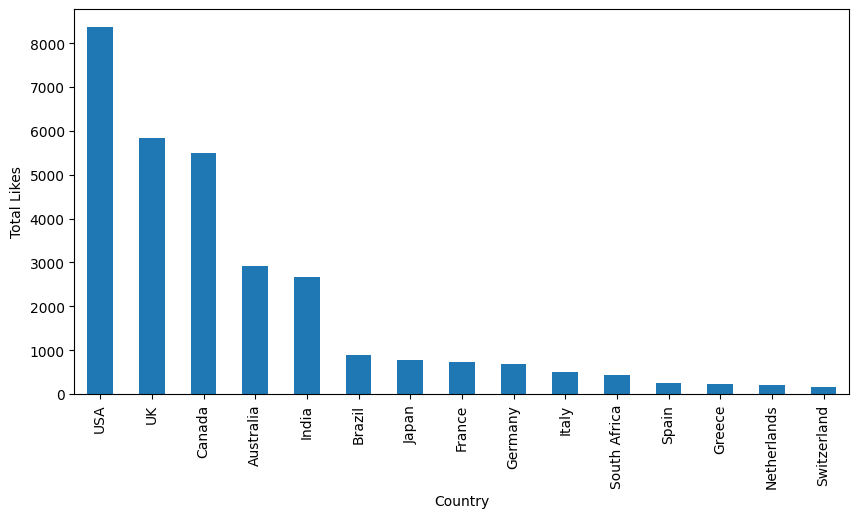

In [ ]:
plt.figure(figsize=(10, 5))
plt.ylabel("Total Likes")
df2.groupby('Country')['Likes'].sum().nlargest(15).plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '#Wonder #StargazingAdventure'),
  Text(1, 0, '#Playful #CarnivalEscapade'),
  Text(2, 0, '#Harmony #MusicalUnity'),
  Text(3, 0, '#Proud #ScalingPeaks'),
  Text(4, 0, '#Compassionate #TearsOfEmpathy'),
  Text(5, 0, '#Coziness #WarmWinterEvening'),
  Text(6, 0, '#Inspiration #ForestWhispers'),
  Text(7, 0, '#Playful #JugglingResponsibilities'),
  Text(8, 0, '#Radiance #SpringBlooms'),
  Text(9, 0, '#TimelessTunes #SeniorJazz')])

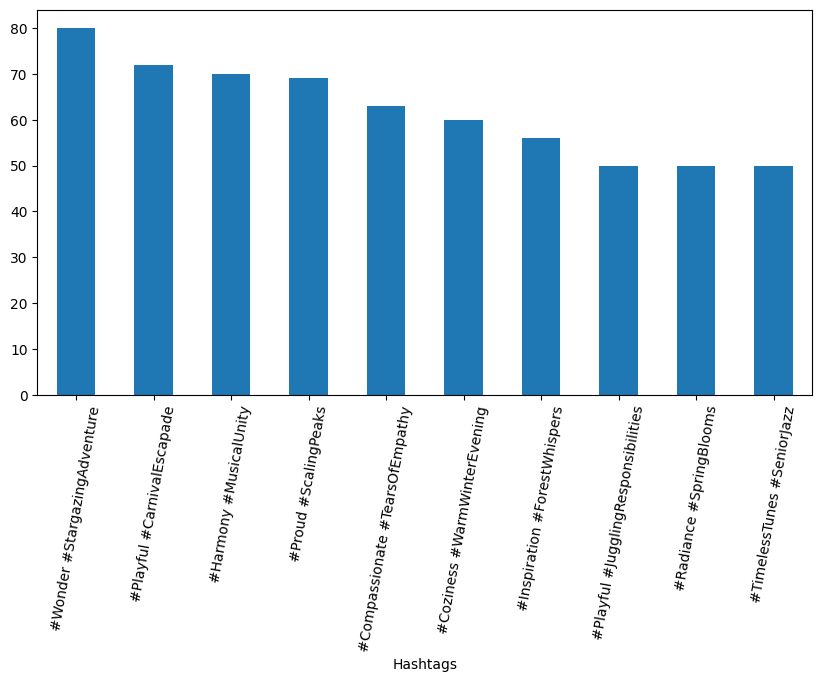

In [ ]:
plt.figure(figsize=(10, 5))
df3=df2.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=80)

Text(0.5, 1.0, "Accumulative 'Likes' over years on Twitter")

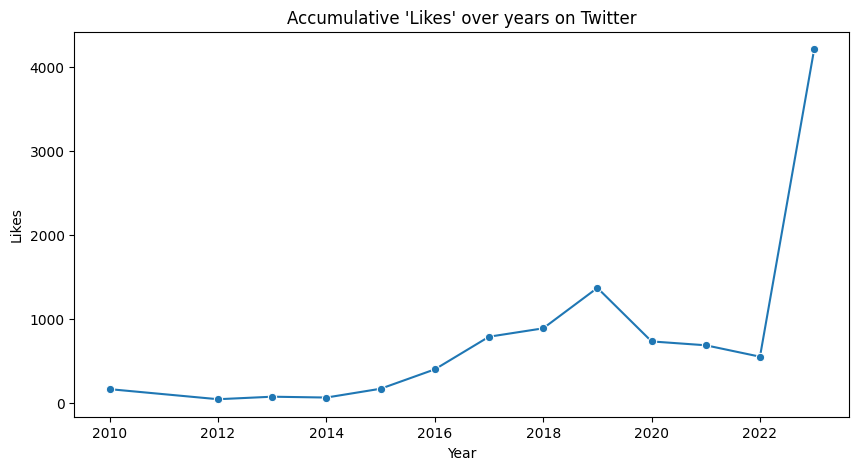

In [ ]:
Twitter=df2[df2['Platform']=='Twitter']
df5=Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=df5, x='Year', y='Likes', marker='o')
plt.title("Accumulative 'Likes' over years on Twitter")

Text(0.5, 1.0, "Accumulative 'Retweets' over time on Instagram")

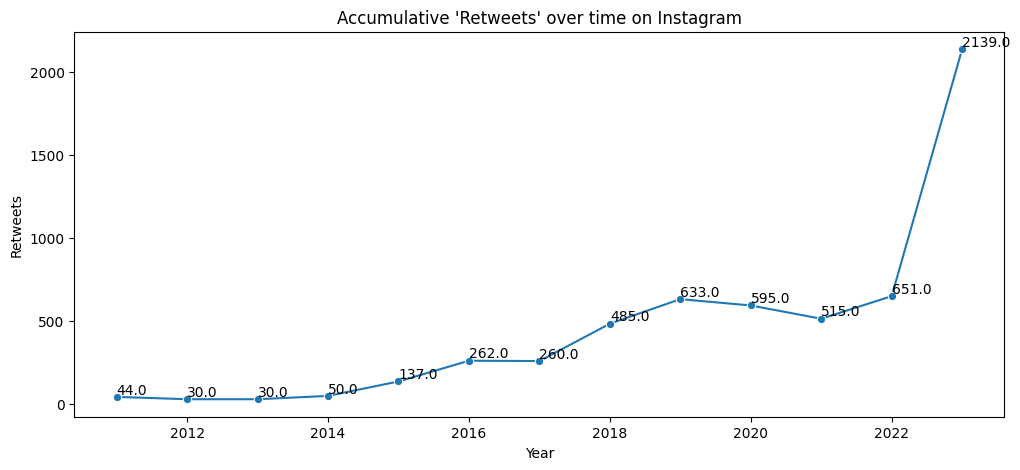

In [ ]:
Instagram=df2[df2['Platform']=='Instagram']
df_ins=Instagram.groupby('Year')['Retweets'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_ins, x='Year', y='Retweets', marker='o')
for index, value in df_ins.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')   #optional
plt.title("Accumulative 'Retweets' over time on Instagram")